# Project members
 ## Preetpal Singh, Geo Abrahim, Rohan Solanke, Sandeep Dey

# Problem Statement
An anonymized dataset containing a large number of numeric variables is provided. The "**TARGET**" column is the variable to predict.
**The task is to predict the probability that each customer in the test set is an unsatisfied customer.**

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split


import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier

from sklearn.metrics import accuracy_score


from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso,LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from pandas import Series, DataFrame
from xgboost import XGBClassifier
from sklearn.linear_model import Lasso
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import GridSearchCV, cross_val_score
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
import plotly.express as px
import plotly.graph_objects as go

## *⚠️⚠️Set this flag to true only when doing full run or else computation will take a lot of time⚠️⚠️*

In [ ]:
flag = False

> **Reading dataset and checking the data**

In [ ]:
df = pd.read_csv("train.csv") # the df dataset is now a Pandas DataFrame
df.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,...,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var8_hace2,saldo_medio_var8_hace3,saldo_medio_var8_ult1,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_largo_ult1,saldo_medio_var13_largo_ult3,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_hace3,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var17_ult1,saldo_medio_var17_ult3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,300.0,122.22,300.0,240.75,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3.00,2.07,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,195.0,195.0,0.0,0.0,195.0,0.0,0.0,195.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,91.56,138.84,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,...,40501.08,13501.47,0.0,0.0,0.0,0.0,0.0,0.0,85501.89,85501.89,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


# Satander Customer Satisfaction Data Analysis

> **Find the shape of dataset**

In [ ]:
print(df.shape)

(76020, 371)


**Inference:** Training set contains 370 predictors along with 1 response variable.

> **Check for missing values**

In [ ]:
print(df.isnull().sum())

ID                         0
var3                       0
var15                      0
imp_ent_var16_ult1         0
imp_op_var39_comer_ult1    0
                          ..
saldo_medio_var44_hace3    0
saldo_medio_var44_ult1     0
saldo_medio_var44_ult3     0
var38                      0
TARGET                     0
Length: 371, dtype: int64


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.describe() #to check the Data distribution for each feature

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,...,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var8_hace2,saldo_medio_var8_hace3,saldo_medio_var8_ult1,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_largo_ult1,saldo_medio_var13_largo_ult3,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_hace3,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var17_ult1,saldo_medio_var17_ult3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.0,76020.0,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000,7.602000e+04,7.602000e+04,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,7.602000e+04,76020.000000,76020.0,76020.000000,76020.000000,7.602000e+04,7.602000e+04,7.602000e+04,7.602000e+04,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,3.160715,68.803937,113.056934,68.205140,113.225058,137.242763,68.618087,113.792410,140.403479,5.477676,0.011458,0.003762,0.0,0.0,0.958024,0.663760,0.000105,0.000026,0.032833,0.028598,0.067522,0.045462,0.052249,0.042936,0.041476,0.010168,0.009997,0.000026,0.000026,0.050855,...,1077.256756,1048.856447,68.275452,9.505287,124.620962,110.026575,3.997023e+03,613.534443,5.703008e+03,4.401002e+03,3639.419939,556.184178,4852.261814,3857.848542,771.227449,162.170439,9.569502e+02,7.509563e+02,0.175324,0.0,0.513023,0.344174,9.117181e+01,3.646318e+01,1.310316e+02,1.092169e+02,0.213071,0.001910,0.253907,0.186630,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,95.268204,319.605516,512.154823,531.897917,950.086398,697.712596,535.473750,953.578624,712.767240,465.391149,0.106425,0.061221,0.0,0.0,0.200535,0.472425,0.010258,0.005129,0.178202,0.166674,0.250925,0.208316,0.222531,0.202714,0.199390,0.100325,0.099486,0.005129,0.005129,0.219703,...,9614.906985,8189.948852,1733.838226,519.389157,2205.249804,1935.305713,3.777314e+04,9292.752726,4.620254e+04,3.550718e+04,26359.174223,7182

> **Find out data types in dataset**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.8 MB


**Inference:** There are no categorical variables.

In [ ]:
# TARGET==1,  for unsatisfied customers and TARGET==1 for satisfied customers.

df1 = pd.DataFrame(df.TARGET.value_counts())
df1['Percentage'] = 100*df1['TARGET']/df.shape[0]
df1

,TARGET,Percentage
0,73012,96.043147
1,3008,3.956853


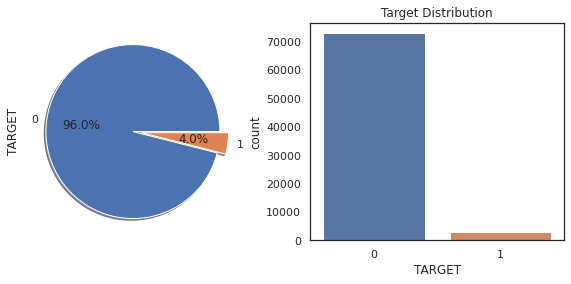

In [ ]:
f, ax = plt.subplots(1,2,figsize=(10,4))
plt.title('Target Distribution')
df['TARGET'].value_counts().plot.pie(
    explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True
)
sns.countplot('TARGET', data=df, ax=ax[1])
plt.show()

**Inference**: A little less then 4% are unhappy => unbalanced dataset

# **Feature Selecion Methods**

> **1. Constant Features**

In [ ]:
constant_features = [features for features in df.columns if df[features].std() == 0]
print("Number of constant features in train dataset is ",len(constant_features))

Number of constant features in train dataset is  34


In [ ]:
df[constant_features[0]].value_counts
print(constant_features)

['ind_var2_0', 'ind_var2', 'ind_var27_0', 'ind_var28_0', 'ind_var28', 'ind_var27', 'ind_var41', 'ind_var46_0', 'ind_var46', 'num_var27_0', 'num_var28_0', 'num_var28', 'num_var27', 'num_var41', 'num_var46_0', 'num_var46', 'saldo_var28', 'saldo_var27', 'saldo_var41', 'saldo_var46', 'imp_amort_var18_hace3', 'imp_amort_var34_hace3', 'imp_reemb_var13_hace3', 'imp_reemb_var33_hace3', 'imp_trasp_var17_out_hace3', 'imp_trasp_var33_out_hace3', 'num_var2_0_ult1', 'num_var2_ult1', 'num_reemb_var13_hace3', 'num_reemb_var33_hace3', 'num_trasp_var17_out_hace3', 'num_trasp_var33_out_hace3', 'saldo_var2_ult1', 'saldo_medio_var13_medio_hace3']


**Inference:** There are 34 constant feature columns with same value in all the data(zero variance) out of 371 columns which does not provide any predictive information of output variable.

In [ ]:
#deleting constant features from dataframe
df.drop(labels = constant_features, axis = 1, inplace=True)
print(df.shape) #checking the shape now

(76020, 337)


> **2. Quasi - Constant Features**

In [ ]:
# Create a empty list
quasi_constant_feat = []

# Loop for searching all the columns in the data
for feature in df.columns:
    
    # find the predominant value
    predominant = (df[feature].value_counts() / np.float(
        len(df))).sort_values(ascending=False).values[0]
    
    # evaluate predominant feature
    if predominant > 0.999:   #a column is quasi-constant feature column if more than 99% of the data has same value.
        quasi_constant_feat.append(feature)

len(quasi_constant_feat)

112

**Inference:** In the data, there are 112 features that have more than 99.9% of the same value. It's best to get rid of these because the output variable will not be dependent on them.

In [ ]:
#deleting constant features from dataframe
df.drop(labels = quasi_constant_feat, axis = 1, inplace=True)
print(df.shape) #checking the shape now

(76020, 225)


**3. Duplicated Features**

In [ ]:
# List for duplicated features
duplicated_feat = []
for i in range(0, len(df.columns)):

    col_1 = df.columns[i]

    for col_2 in df.columns[i + 1:]:

        # if the features are duplicated
        if df[col_1].equals(df[col_2]):

            # and then append the duplicated one to a list
            duplicated_feat.append(col_2)

In [ ]:
duplicated_features = set(duplicated_feat) #A set will always contain the unique values
print(len(duplicated_features))

10


**Inference:** There are 10 duplicate features exist in the data and can be dropped.

In [ ]:
df.drop(labels = duplicated_features, axis = 1, inplace = True)
print(df.shape) #checking the shape now

(76020, 215)


**4. Correlation**

In [ ]:
a = np.abs(df.corr()['TARGET'])>0.1

In [ ]:
df.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var5_0,ind_var5,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13,ind_var14_0,ind_var14,ind_var17_0,ind_var17,ind_var19,ind_var20_0,ind_var20,ind_var24_0,...,num_op_var41_efect_ult1,num_op_var41_efect_ult3,num_op_var39_efect_ult1,num_op_var39_efect_ult3,num_sal_var16_ult1,num_var43_emit_ult1,num_var43_recib_ult1,num_trasp_var11_ult1,num_var45_hace2,num_var45_hace3,num_var45_ult1,num_var45_ult3,saldo_medio_var5_hace2,saldo_medio_var5_hace3,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var8_hace2,saldo_medio_var8_hace3,saldo_medio_var8_ult1,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_largo_ult1,saldo_medio_var13_largo_ult3,saldo_medio_var17_hace2,saldo_medio_var17_ult1,saldo_medio_var17_ult3,saldo_medio_var44_hace2,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0.00,88.89,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,300.0,122.22,300.0,240.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,3.00,0.18,3.00,2.07,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,195.0,195.0,0.0,0.0,195.0,0.0,0.0,195.0,0.0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,27,3,18,48,186.09,0.00,91.56,138.84,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,3,6,3,0,0,0,0,3.00,0.30,40501.08,13501.47,0.0,0.0,0.0,0.0,0.0,0.0,85501.89,85501.89,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [ ]:
# numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
# numerical_vars = list(df.select_dtypes(include=numerics).columns)
# df = df[numerical_vars]
# df.shape

In [ ]:
grouped_feature_ls = []
correlated_groups = []

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features = correlation(df, 0.85) # filter for all the features with correlation more than 85%
correlated_features = set(corr_features) # Set statement is used to identify the unique feature in the list
print(len(correlated_features)) # length of set of correlated features

117


**Inference:**  There are 117 features which are highly correlated with other variables (>0.85) which can be excluded.

In [ ]:
df.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var5_0,ind_var5,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13,ind_var14_0,ind_var14,ind_var17_0,ind_var17,ind_var19,ind_var20_0,ind_var20,ind_var24_0,...,num_op_var41_efect_ult1,num_op_var41_efect_ult3,num_op_var39_efect_ult1,num_op_var39_efect_ult3,num_sal_var16_ult1,num_var43_emit_ult1,num_var43_recib_ult1,num_trasp_var11_ult1,num_var45_hace2,num_var45_hace3,num_var45_ult1,num_var45_ult3,saldo_medio_var5_hace2,saldo_medio_var5_hace3,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var8_hace2,saldo_medio_var8_hace3,saldo_medio_var8_ult1,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_largo_ult1,saldo_medio_var13_largo_ult3,saldo_medio_var17_hace2,saldo_medio_var17_ult1,saldo_medio_var17_ult3,saldo_medio_var44_hace2,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0.00,88.89,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,300.0,122.22,300.0,240.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,3.00,0.18,3.00,2.07,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,195.0,195.0,0.0,0.0,195.0,0.0,0.0,195.0,0.0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,27,3,18,48,186.09,0.00,91.56,138.84,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,3,6,3,0,0,0,0,3.00,0.30,40501.08,13501.47,0.0,0.0,0.0,0.0,0.0,0.0,85501.89,85501.89,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [ ]:
# Dropping all the correlated features from the data
df.drop(labels=correlated_features, axis=1, inplace=True)
print(df.shape) #checking the shape now

(76020, 98)


In [ ]:
df.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var40_comer_ult1,imp_op_var40_ult1,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var5_0,ind_var5,ind_var12_0,ind_var12,ind_var13_0,ind_var13_largo_0,ind_var14_0,ind_var14,ind_var17_0,ind_var19,ind_var20_0,ind_var25_cte,ind_var30_0,ind_var30,ind_var31_0,ind_var32_cte,ind_var37_cte,ind_var39_0,ind_var44_0,num_var4,num_var14_0,num_var17_0,num_op_var40_hace2,num_op_var40_ult1,num_op_var41_hace2,num_op_var41_hace3,num_op_var41_ult1,num_var30_0,...,imp_aport_var13_ult1,imp_var7_recib_ult1,imp_compra_var44_ult1,imp_var43_emit_ult1,imp_trans_var37_ult1,ind_var7_recib_ult1,ind_var43_emit_ult1,ind_var43_recib_ult1,var21,num_aport_var13_hace3,num_aport_var13_ult1,num_compra_var44_ult1,num_ent_var16_ult1,num_var22_hace2,num_var22_hace3,num_var22_ult1,num_var22_ult3,num_med_var45_ult3,num_meses_var13_largo_ult3,num_meses_var39_vig_ult3,num_op_var40_comer_ult1,num_op_var41_efect_ult1,num_sal_var16_ult1,num_var43_emit_ult1,num_var43_recib_ult1,num_trasp_var11_ult1,num_var45_hace3,saldo_medio_var5_hace2,saldo_medio_var5_hace3,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var8_hace2,saldo_medio_var8_hace3,saldo_medio_var12_hace3,saldo_medio_var13_corto_hace3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var44_hace2,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,3,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,6,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0.00,88.89,0.00,0.00,0.0,0.0,0.0,122.22,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,3,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,3.00,0.18,3.00,2.07,0.0,0.0,0.0,0.00,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,0.0,0.0,0.0,0.0,0.0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,3,0,0,0,0,0,0,9,3,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,3,0,0,3,15,0,1,0,0,0,0,0,0,3,186.09,0.00,91.56,138.84,0.0,0.0,0.0,0.00,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,6,...,0.0,0.0,0.0,135003.0,270003.0,0,1,1,0,0,0,0,0,3,0,6,9,0,0,2,0,0,0,3,6,3,0,3.00,0.30,40501.08,13501.47,0.0,0.0,0.0,0.00,0.0,0.0,0.0,117310.979016,0


In [ ]:
df.columns

Index(['ID', 'var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1',
       'imp_op_var40_comer_ult1', 'imp_op_var40_ult1',
       'imp_op_var41_efect_ult1', 'imp_op_var41_efect_ult3',
       'imp_sal_var16_ult1', 'ind_var1_0', 'ind_var1', 'ind_var5_0',
       'ind_var5', 'ind_var12_0', 'ind_var12', 'ind_var13_0',
       'ind_var13_largo_0', 'ind_var14_0', 'ind_var14', 'ind_var17_0',
       'ind_var19', 'ind_var20_0', 'ind_var25_cte', 'ind_var30_0', 'ind_var30',
       'ind_var31_0', 'ind_var32_cte', 'ind_var37_cte', 'ind_var39_0',
       'ind_var44_0', 'num_var4', 'num_var14_0', 'num_var17_0',
       'num_op_var40_hace2', 'num_op_var40_ult1', 'num_op_var41_hace2',
       'num_op_var41_hace3', 'num_op_var41_ult1', 'num_var30_0',
       'num_var37_med_ult2', 'saldo_var1', 'saldo_var5', 'saldo_var8',
       'saldo_var12', 'saldo_var13_corto', 'saldo_var13_largo', 'saldo_var14',
       'saldo_var17', 'saldo_var20', 'saldo_var26', 'saldo_var30',
       'saldo_var37', 'saldo_var44

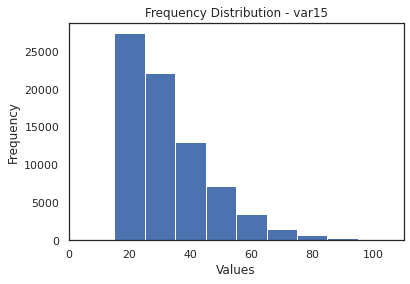

In [ ]:
# df['var15'].describe()
plt.hist(df['var15'])
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Frequency Distribution - var15")
plt.show()

In [ ]:
list(df.columns).remove('var15')

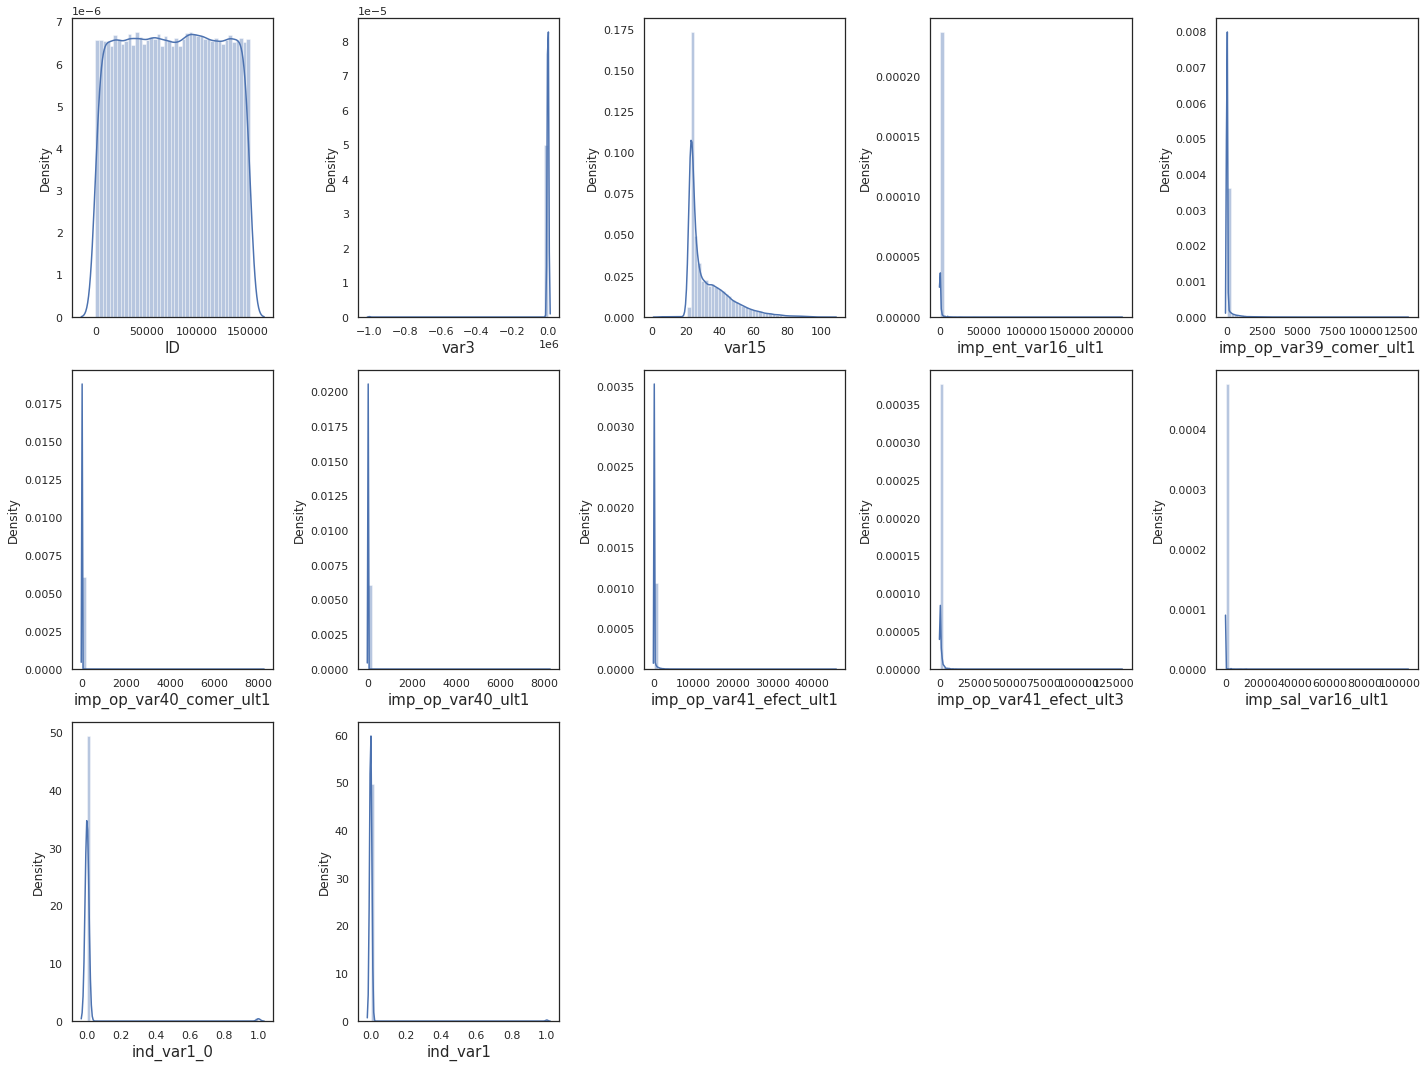

In [ ]:
# Data distribution for every column except for var15

plt.figure(figsize = (20, 15))
plotnumber = 1

for column in list(df.columns.values.tolist()):
    if plotnumber < 13:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize = 15)
    plotnumber += 1
    
plt.tight_layout()
plt.show()

In [ ]:
#removing ID column from df
df.drop(labels='ID', axis=1, inplace=True)
print(df.shape) #checking the shape now

(76020, 97)


In [ ]:
seed = 0

In [ ]:
X = df.drop('TARGET', axis=1)
y = df['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, stratify=y, random_state=seed)

In [ ]:
y_test.value_counts().values[0] / y_test.value_counts().values[1]

24.272606382978722

In [ ]:
#upsampling both training and test data
sm = SMOTE(random_state=seed)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# **Performing model selection.**

### Fitting the vanilla logistic regression model with using class weights as balanced

In [ ]:
#function to plot confusion matrix
def plot_confusion(cm, title: str, ax) -> None:
  '''
  params: 
    cm - confusion matrix
    title: title of the plot
    ax: axis
  '''
  sns.heatmap(cm, annot=True, fmt='g')
  ax.set_xlabel("Predicted labels")
  ax.set_ylabel("Actual labels")
  ax.set_title(title)
  plt.show()

In [ ]:
models = ['Logistic regression', 'Decision tree', 'Random Forest'
          , 'Bagging Classifier', "XGB class weights", "XGB upsampled data", 
          "AdaBoost with random tree", "AdaBoost with decision tree"]

#### ⚠️⚠️⚠️ Make sure to run the cell below from here onwards so that model accucary list won't hinder and make results confusing

In [ ]:
models_accuracy = []
models_AUC_score = []
model_recall = []

In [ ]:
#Fitting vanilla logistic regression with max_iter = 2000000 and default c value with class weight as balanced
lr_model = LogisticRegression(max_iter=2000000, random_state=seed)
lr_model.fit(X_train_res, y_train_res)
y_pred_lr = lr_model.predict(X_test)
acc_lr = accuracy_score(y_test, y_pred_lr)
models_accuracy.append(acc_lr)
print(f"Logistic regression Vanilla model accuracy: {acc_lr:.3f}")

Logistic regression Vanilla model accuracy: 0.960


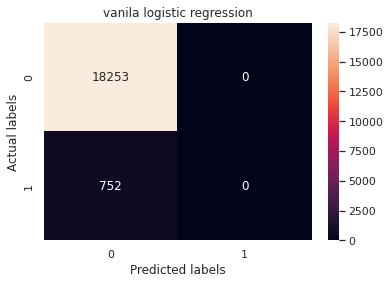

In [ ]:
ax = plt.subplot()
cm=confusion_matrix(y_test, y_pred_lr)
plot_confusion(cm, "vanila logistic regression", ax)

In [ ]:
rec_lr = recall_score(y_test, y_pred_lr)
model_recall.append(rec_lr)
print(f"Recall score of logistic regression is approx: {rec_lr:.3f}")

Recall score of logistic regression is approx: 0.000


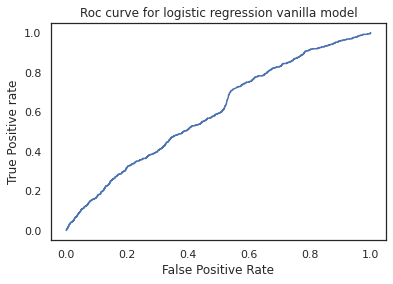

Logsitc regreesion Roc accuracy score is approx: 0.5986720268076015


In [ ]:
#Plotting roc curve graph.
y_pred_proba = lr_model.predict_proba(X_test)
roc_mat = roc_curve(y_test, y_pred_proba[:, 1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive rate")
plt.title("Roc curve for logistic regression vanilla model")
#lt.plot(range(0,11), range(0,11), '--', alpha=0.3)
plt.plot(roc_mat[0], roc_mat[1])
plt.show()
roc_lr = roc_auc_score(y_test, y_pred_proba[:,1])
models_AUC_score.append(roc_lr)
print(f"Logsitc regreesion Roc accuracy score is approx: {roc_lr}")

The recall is worse which is 0

### Vanilla decision tree classifier

> Indented block



In [ ]:
dtree = DecisionTreeClassifier(random_state=seed)
dtree.fit(X_train_res, y_train_res)

DecisionTreeClassifier(random_state=0)

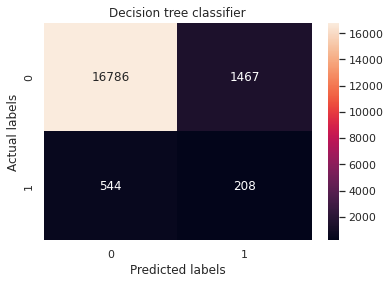

In [ ]:
#Skipping the plotting of dtree as it is having a lot of features and will be hard to analyse
y_pred_dt = dtree.predict(X_test)
cm = confusion_matrix(y_test, y_pred_dt)
ax=plt.subplot()
plot_confusion(cm, "Decision tree classifier", ax)

In [ ]:
rec_dt = recall_score(y_test, y_pred_dt)
model_recall.append(rec_dt)
print(f"Recall score of Decision Tree is approx: {rec_dt:.3f}")

Recall score of Decision Tree is approx: 0.277


In [ ]:
y_pred_train = dtree.predict(X_train)
train_acc = accuracy_score(y_train, y_pred_train)
print(f"Train accuracy is approx: {train_acc:.3f}")

Train accuracy is approx: 0.982


In [ ]:
acc_dt = accuracy_score(y_test, y_pred_dt)
models_accuracy.append(acc_dt)
print(f"Decision tree model accuracy is approx: {acc_dt:.3f}")

Decision tree model accuracy is approx: 0.894


In [ ]:
y_pred_proba_dt = dtree.predict_proba(X_test)
auc_dt = roc_auc_score(y_test, y_pred_proba_dt[:,1])
models_AUC_score.append(auc_dt)
print(f"Model roc auc auccracy score is approx: {auc_dt:.3f}")

Model roc auc auccracy score is approx: 0.600


### Random forest


In [ ]:
rf = RandomForestClassifier(oob_score=True, random_state=seed)
rf.fit(X_train_res, y_train_res)

RandomForestClassifier(oob_score=True, random_state=0)

In [ ]:
rf.oob_score_

0.9509943570919849

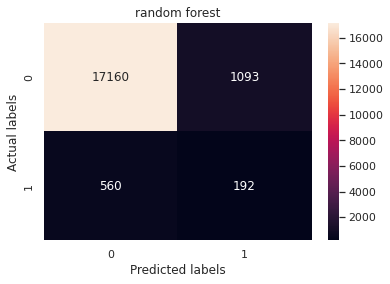

In [ ]:
y_pred_rf = rf.predict(X_test)
cm1=confusion_matrix(y_test, y_pred_rf)
ax = plt.subplot()
plot_confusion(cm1, "random forest", ax)

In [ ]:
rec_rf = recall_score(y_test, y_pred_rf)
model_recall.append(rec_rf)
print(f"Random forest recall score is approx: {rec_rf:.3f}")

Random forest recall score is approx: 0.255


In [ ]:
acc_rf =  accuracy_score(y_test, y_pred_rf)
models_accuracy.append(acc_rf)
print(f"Random forest model accuracy is approx: {acc_rf:.3f}")

Random forest model accuracy is approx: 0.913


In [ ]:
y_pred_proba_rf = rf.predict_proba(X_test)
auc_rf = roc_auc_score(y_test, y_pred_proba_rf[:,1])
models_AUC_score.append(auc_rf)
print(f"Random forest model roc auc accuracy is approx: {auc_rf:.3f}")

Random forest model roc auc accuracy is approx: 0.767


### Decision Tree Bagging

In [ ]:
bag_model = BaggingClassifier(random_state=seed)
bag_model.fit(X_train_res, y_train_res)

BaggingClassifier(random_state=0)

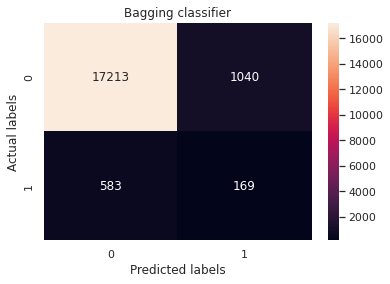

In [ ]:
y_pred_bt = bag_model.predict(X_test)
y_pred_proba_bt = bag_model.predict_proba(X_test)
cm = confusion_matrix(y_test, y_pred_bt)
ax = plt.subplot()
plot_confusion(cm, "Bagging classifier", ax)

In [ ]:
rec_bt = recall_score(y_test, y_pred_bt)
model_recall.append(rec_bt)
print(f"Bagging classifier model recall is: {rec_bt:.3f}")

Bagging classifier model recall is: 0.225


In [ ]:
acc_bt = accuracy_score(y_test, y_pred_bt)
models_accuracy.append(acc_bt)
print(f"Bagging classifier model accuracy is: {acc_bt:.3f}")

Bagging classifier model accuracy is: 0.915


In [ ]:
auc_bt = roc_auc_score(y_test, y_pred_proba_bt[:,1])
models_AUC_score.append(auc_bt)
print(f"Model roc auc auccracy score is: {auc_bt:.3f}")

Model roc auc auccracy score is: 0.716


### Fitting a gradient booster classifier model.


1.   with optimal class weights 
2.   with upsampled data




#### XGBoost with class weights

In [ ]:
maj_class_count, minority_class_count = sorted(y_train.value_counts().values, reverse=True)
maj_class_count, minority_class_count

(54759, 2256)

In [ ]:
# optimal class weight as mentioned in xgboost docs coule be set as majority no of samples / minority no of samples
optimal_class_weight = maj_class_count / minority_class_count
optimal_class_weight

24.272606382978722

In [ ]:
# Gradient boosting with optimal class weight (majorit/minority)
xgb = XGBClassifier(scale_pos_weight=optimal_class_weight, random_sate=seed)
xgb.fit(X_train, y_train)

XGBClassifier(random_sate=0, scale_pos_weight=24.272606382978722)

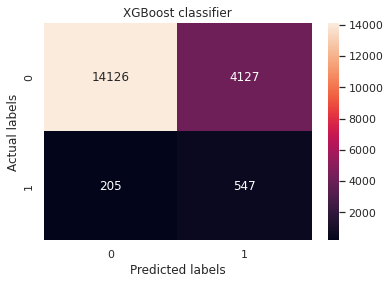

In [ ]:
# ⚠️⚠️ make sure to change y_pred_ before copy
y_pred_xgb = xgb.predict(X_test)
y_pred_proba_xgb = xgb.predict_proba(X_test)
cm = confusion_matrix(y_test, y_pred_xgb)
ax=plt.subplot()
plot_confusion(cm, "XGBoost classifier", ax)

In [ ]:
rec_xgb = recall_score(y_test, y_pred_xgb)
model_recall.append(rec_xgb)
print(f"XGBooster(with class weights) model recall is approx: {rec_xgb:.3f}")

XGBooster(with class weights) model recall is approx: 0.727


In [ ]:
acc_xgb = accuracy_score(y_test, y_pred_xgb)
models_accuracy.append(acc_xgb)
print(f"XGBooster(with class weights) model accuracy is approx: {acc_xgb:.3f}")

XGBooster(with class weights) model accuracy is approx: 0.772


In [ ]:
auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb[:,1])
models_AUC_score.append(auc_xgb)
print(f"Xgbooster(with class weights) model AUC score is approx: {auc_xgb:.3f}")

Xgbooster(with class weights) model AUC score is approx: 0.829


#### XGBoost with upsampled sata

In [ ]:
xgb1 = XGBClassifier(random_sate=seed)
xgb1.fit(X_train_res, y_train_res)

XGBClassifier(random_sate=0)

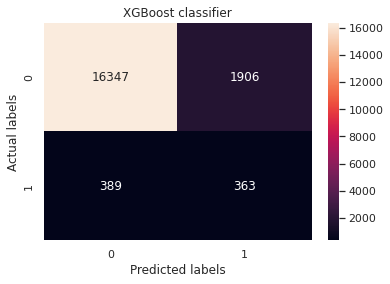

In [ ]:
# ⚠️⚠️ make sure to change y_pred_ before copy
y_pred_xgb_ = xgb1.predict(X_test)
y_pred_proba_xgb_ = xgb1.predict_proba(X_test)
cm = confusion_matrix(y_test, y_pred_xgb_)
ax=plt.subplot()
plot_confusion(cm, "XGBoost classifier", ax)

In [ ]:
rec_xgb_ = recall_score(y_test, y_pred_xgb_)
model_recall.append(rec_xgb_)
print(f"XGBoost(with upsampled data)  model recall is approx: {rec_xgb_:.3f}")

XGBoost(with upsampled data)  model recall is approx: 0.483


In [ ]:
acc_xgb_ = accuracy_score(y_test, y_pred_xgb_)
models_accuracy.append(acc_xgb_)
print(f"XGBoost model(with upsampled data) model accuracy is approx: {acc_xgb_:.3f}")

XGBoost model(with upsampled data) model accuracy is approx: 0.879


In [ ]:
auc_xgb_ = roc_auc_score(y_test, y_pred_proba_xgb_[:,1])
models_AUC_score.append(auc_xgb_)
print(f"XGBoost model(with upsampled data) model roc AUC is approx{auc_xgb_:.3f}")

XGBoost model(with upsampled data) model roc AUC is approx0.811


### Fitting adaboost model to our data


1.   with random forest as base model 
2.   with decision tree as base model



#### Adaboost with random forest as a weak learner

In [ ]:
adaboost = AdaBoostClassifier(RandomForestClassifier(n_estimators=1, max_depth=1), 
                              n_estimators=100,
                              random_state=seed)

In [ ]:
adaboost.fit(X_train_res, y_train_res)

AdaBoostClassifier(base_estimator=RandomForestClassifier(max_depth=1,
                                                         n_estimators=1),
                   n_estimators=100, random_state=0)

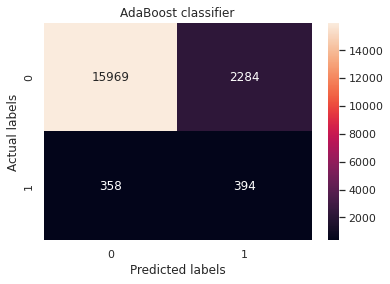

In [ ]:
y_pred_ad = adaboost.predict(X_test)
y_pred_proba_ad = adaboost.predict_proba(X_test)
cm = confusion_matrix(y_test, y_pred_ad)
ax=plt.subplot()
plot_confusion(cm, "AdaBoost classifier", ax)

In [ ]:
rec_ad = recall_score(y_test, y_pred_ad)
model_recall.append(rec_ad)
print(f"AdaBoost model(random forest) is having recall of approx: {rec_ad:.3f}")

AdaBoost model(random forest) is having recall of approx: 0.524


In [ ]:
acc_ad = accuracy_score(y_test, y_pred_ad)
models_accuracy.append(acc_ad)
print(f"AdaBoost model(random forest) model accuracy ia approx: {acc_ad}")

AdaBoost model(random forest) model accuracy ia approx: 0.8609839515916864


In [ ]:
auc_ad = roc_auc_score(y_test, y_pred_proba_ad[:,1])
models_AUC_score.append(auc_ad)
print(f"AdaBoost model(random forest) model roc AUC score is approx: {auc_ad:.3f}")

AdaBoost model(random forest) model roc AUC score is approx: 0.793


#### Adaboost with decision tree as base model

In [ ]:
adaboost1 = AdaBoostClassifier(n_estimators=100, random_state=seed)

In [ ]:
adaboost1.fit(X_train_res, y_train_res)

AdaBoostClassifier(n_estimators=100, random_state=0)

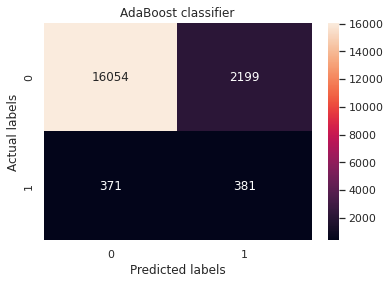

In [ ]:
y_pred_ad_ = adaboost1.predict(X_test)
y_pred_proba_ad_ = adaboost1.predict_proba(X_test)
cm = confusion_matrix(y_test, y_pred_ad_)
ax=plt.subplot()
plot_confusion(cm, "AdaBoost classifier", ax)

In [ ]:
rec_ad_ = recall_score(y_test, y_pred_ad_)
model_recall.append(rec_ad_)
print(f"AdaBoost model(decision tree) is having recall of approx: {rec_ad_:.3f}")

AdaBoost model(decision tree) is having recall of approx: 0.507


In [ ]:
acc_ad_ = accuracy_score(y_test, y_pred_ad_)
models_accuracy.append(acc_ad_)
print(f"AdaBoost model model accuracy ia approx: {acc_ad_:.3f}")

AdaBoost model model accuracy ia approx: 0.865


In [ ]:
auc_ad_ = roc_auc_score(y_test, y_pred_proba_ad_[:,1])
models_AUC_score.append(auc_ad_)
print(f"AdaBoost model(random forest) model roc AUC score is approx: {auc_ad_:.3f}")

AdaBoost model(random forest) model roc AUC score is approx: 0.798


In [ ]:
df_models = pd.DataFrame({ "Models":models, "Recall": model_recall, "ROC AUC": models_AUC_score, "Accuracy": models_accuracy})
cm = sns.light_palette("red", as_cmap=True)
df_models.style.background_gradient(cmap="Blues")

,Models,Recall,ROC AUC,Accuracy
0,Logistic regression,0.000000,0.598672,0.960431
1,Decision tree,0.276596,0.600370,0.894186
2,Random Forest,0.255319,0.767318,0.913023
3,Bagging Classifier,0.224734,0.716310,0.914601
4,XGB class weights,0.727394,0.828996,0.772060
5,XGB upsampled data,0.482713,0.811215,0.879242
6,AdaBoost with random tree,0.523936,0.792860,0.860984
7,AdaBoost with decision tree,0.506649,0.797978,0.864772


In [ ]:
# Our best model is XGB classifer with clas weights set to optimal i.e. (majority count/minority counts)
Best_model = XGBClassifier(scale_pos_weight=optimal_class_weight, random_sate=seed)

In [ ]:
fig = go.Figure(data=[
    go.Bar(name='Recall', x=models, y=df_models['Recall'], text=round(df_models['Recall'], 3)),
    go.Bar(name='ROC AUC', x=models, y=df_models['ROC AUC'], text=round(df_models['ROC AUC'], 3)),
    go.Bar(name='Accuracy', x=models, y=df_models['Accuracy'], text=round(df_models['Accuracy'], 3))
])

fig.update_layout(barmode='group', title_text="Model's accuracy")
fig.show()

# Important Features
#### Finding the features which impacted our models the most

In [ ]:
idx = importances > 0.01

In [ ]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
forest_importances = pd.Series(importances[idx], index=X_train.columns[idx])

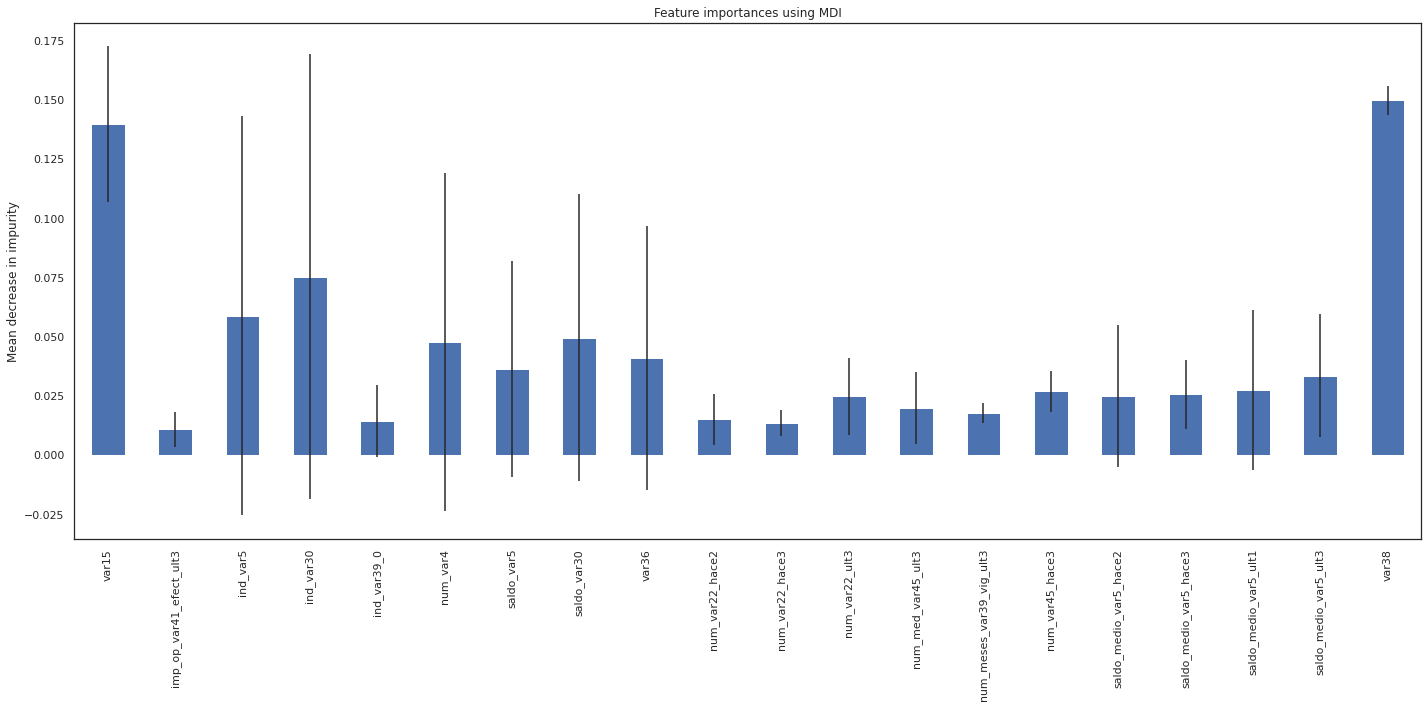

In [ ]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std[idx], ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
plt.rcParams["figure.figsize"] = (20,15)
fig.tight_layout()

In [ ]:
print("Importance features are: ")
imp_features

Importance features are: 


Index(['var15', 'imp_op_var41_efect_ult3', 'ind_var5', 'ind_var30',
       'ind_var39_0', 'num_var4', 'saldo_var5', 'saldo_var30', 'var36',
       'num_var22_hace2', 'num_var22_hace3', 'num_var22_ult3',
       'num_med_var45_ult3', 'num_meses_var39_vig_ult3', 'num_var45_hace3',
       'saldo_medio_var5_hace2', 'saldo_medio_var5_hace3',
       'saldo_medio_var5_ult1', 'saldo_medio_var5_ult3', 'var38'],
      dtype='object')

# AIM: Best accurate Probability of a cutomer being unsatisifed is given by our XGBoost model with class balancing, having an accuracy of 82%

In [ ]:
# actual numbers of unsatisfied customers in test data is 752
idx = y_test == 1
idx.value_counts()

False    18253
True       752
Name: TARGET, dtype: int64

In [ ]:
y_pred_final = xgb.predict(X_test)
idx1 = y_pred_final == 1
pd.Series(idx1).value_counts()

False    14331
True      4674
dtype: int64

In [ ]:
final_pred = xgb.predict_proba(X_test[idx])

In [ ]:
rounded_prob = np.round(final_pred[:,1], 2)

In [ ]:
# Rounded probability of cutomer prediction being unsatisfied on test data
rounded_prob

array([0.65, 0.83, 0.54, 0.32, 0.83, 0.62, 0.15, 0.7 , 0.65, 0.86, 0.89,
       0.54, 0.83, 0.65, 0.18, 0.75, 0.88, 0.2 , 0.69, 0.85, 0.52, 0.58,
       0.88, 0.88, 0.86, 0.8 , 0.82, 0.75, 0.44, 0.55, 0.85, 0.37, 0.76,
       0.87, 0.12, 0.85, 0.6 , 0.8 , 0.8 , 0.83, 0.63, 0.81, 0.84, 0.85,
       0.88, 0.71, 0.84, 0.72, 0.74, 0.69, 0.81, 0.81, 0.83, 0.42, 0.69,
       0.82, 0.72, 0.79, 0.5 , 0.61, 0.88, 0.88, 0.48, 0.67, 0.82, 0.68,
       0.53, 0.17, 0.87, 0.8 , 0.46, 0.85, 0.53, 0.8 , 0.81, 0.18, 0.73,
       0.87, 0.66, 0.12, 0.86, 0.5 , 0.83, 0.74, 0.76, 0.32, 0.79, 0.87,
       0.17, 0.85, 0.14, 0.72, 0.83, 0.87, 0.26, 0.74, 0.78, 0.8 , 0.83,
       0.92, 0.49, 0.45, 0.85, 0.16, 0.45, 0.28, 0.48, 0.74, 0.65, 0.79,
       0.69, 0.74, 0.15, 0.85, 0.85, 0.36, 0.87, 0.18, 0.38, 0.87, 0.76,
       0.81, 0.83, 0.8 , 0.79, 0.74, 0.7 , 0.76, 0.87, 0.52, 0.44, 0.87,
       0.81, 0.35, 0.83, 0.52, 0.27, 0.77, 0.86, 0.21, 0.66, 0.75, 0.28,
       0.17, 0.56, 0.72, 0.61, 0.8 , 0.87, 0.84, 0.